**Студент**: Савин Александр Андреевич  
**Группа**: М80-114М-23  
**Лабороторная работа номер 1**

1. Градиентный спуск и его модификации
   - Выбрать [тестовые функции оптимизации](https://ru.wikipedia.org/wiki/Тестовые_функции_для_оптимизации) (2 шт)
   - Запрограммировать собственнуб реализацию классического градиентного спуска
   - Запрограммировать пайлайн тестирования алгоритма оптимизации
     - Визуализации функции и точки оптимума
     - Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков
     - Визуализации точки найденного решения (можно добавить анимацию на плюс балл)
   - Запрограммировать метод вычисления градиента
     - Передача функции градиента от пользователя
     - Символьное вычисление градиента (например с помощью [sympy](https://www.sympy.org/en/index.html)) (на доп балл)

Библиотеки

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from abc import ABCMeta, abstractmethod
from scipy.optimize import minimize
from sympy import *

------------------

Абстрактный класс для функции

In [2]:
class Func():
    @abstractmethod
    def full_func():
        print()

    @abstractmethod
    def full_func_gradient():
        print()

    @abstractmethod
    def full_func_draw(self, step = 0.05):
        f = plt.figure()
        f.set_figwidth(6)
        f.set_figheight(6)
        x = np.arange(self.left_x, self.right_x, step)
        y = np.arange(self.left_y, self.right_y, step)
        X, Y = np.meshgrid(x, y)
        Z = self.full_func([X, Y])

        ax = plt.subplot(projection="3d")
        ax.plot_surface(X, Y, Z, cmap="viridis")
        plt.show()


In [3]:
def calc_two_point_err(a, b):
    return pow((abs(a[0]) - abs(b[0])) ** 2 + (abs(a[1]) - abs(b[1])) ** 2, 0.5)

----------------------------

In [4]:
def test_func(func = Func(), nepoch = 10000, lr = 0.01, start = [],
              acc = 0.001):
    print("Function")
    func.full_func_draw()
    x0, y0 = start[0], start[1]
    min = func.min_xyz
    hist = GD.create_gd(nepoch, lr, func, x0, y0, min, acc)
    print("GD work")
    GD.draw_res(func, hist)

    res = minimize(func.full_func, start, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})
    print(f"Точка минимума из описания функции {min}")
    print(f"Точка минимума, полученная аналитическим путем: {res.x}")
    print(f"Точка минимума, полученная с помощью GD: {[hist[-1][0], hist[-1][1]]}")
    print(f"Погрешность GD : {calc_two_point_err(res.x, hist[-1])}")

-----------------

Классический Gradient descent

In [5]:
from numpy import linalg as la
class GD():
    @staticmethod
    def create_gd (
        nepoch = 1000, lr = 0.01,func = Func(),
        x0 = 0, y0 = 0, min_xyz = np.array([0, 0, 0]), acc = 0.001):

        hist = [np.array([x0, y0, func.full_func([x0, y0])])]
        cur = hist[-1]
        for _ in range(nepoch):
            X_der, Y_der = func.full_func_gradient(cur[0], cur[1])
            X_new, Y_new = cur[0] - lr * X_der, cur[1] - lr * Y_der
            cur = (X_new, Y_new, func.full_func([X_new, Y_new]))

            if la.norm(hist[-1] - min_xyz) < acc:
                break

            hist.append(cur)
        print(f"Delta : {la.norm(hist[-1] - min_xyz)}")
        return np.array(hist)

    @staticmethod
    def draw_res(func = Func(), hist = []):
        f = plt.figure()
        f.set_figwidth(10)
        f.set_figheight(10)
        X_lin = np.linspace(-10, 10, 100)
        Y_lin = np.linspace(-10, 10, 100)
        X, Y = np.meshgrid(X_lin, Y_lin)
        Z = func.full_func([X, Y])

        ax = plt.axes(projection = '3d')
        ax.plot_surface(X, Y, Z, cmap = 'viridis', alpha=0.5)
        ax.plot(hist[:, 0], hist[:, 1], hist[:, 2], c='red', alpha = 0.7) # plotting route
        ax.plot(hist[-1, 0], hist[-1, 1], hist[-1, 2], color='orange', marker='o') # min_point


------------------

**Функция Бута**

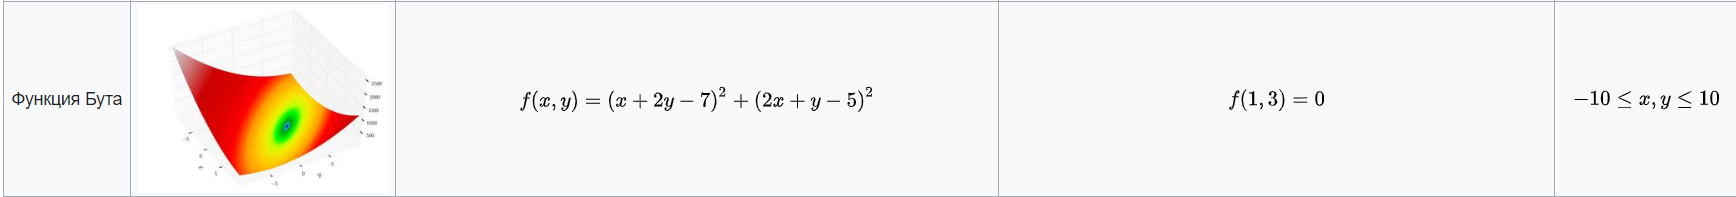

In [6]:
class But(Func):
  def __init__(self):
      self.left_x, self.right_x = -10, 10
      self.left_y, self.right_y = -10, 10
      self.min_xyz = np.array([1, 3, 0])

  def full_func(self, x):
      return (x[0] + 2 * x[1] - 7) ** 2 + (2 * x[0] + x[1] - 5) ** 2

  def full_func_gradient(self, x, y):
      return 10 * x + 8 * y - 34, 8 * x + 10 * y - 38 # dx, dy


In [ ]:
test_func(func = But(), nepoch = 10000, lr = 0.01,
              start = [10, 10], acc = 0.001)

--------------------

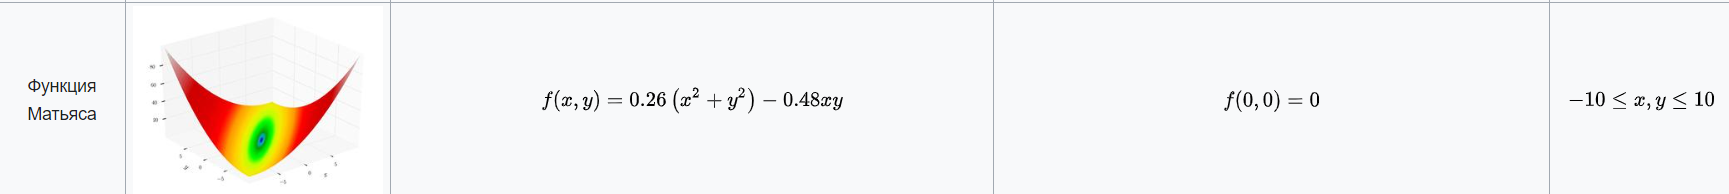

In [8]:
class Matyas(Func):
  def __init__(self):
      self.left_x, self.right_x = -10, 10
      self.left_y, self.right_y = -10, 10
      self.min_xyz = np.array([0, 0, 0])

  def full_func(self, x):
      return 0.26 * (x[0] ** 2 + x[1] ** 2) - 0.48 * x[0] * x[1]

  def full_func_gradient(self, x, y):
      return 0.52 * x - 0.48 * y, 0.52 * y - 0.48 * x # dx, dy

In [ ]:
test_func(func = Matyas(), nepoch = 10000, lr = 0.01,
              start = [10, -10], acc = 0.001)

-----

Your function f(x, y) = (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2
Your start (x, y) : 10 10
Your min (x, y, z) : 1 3 0
Function


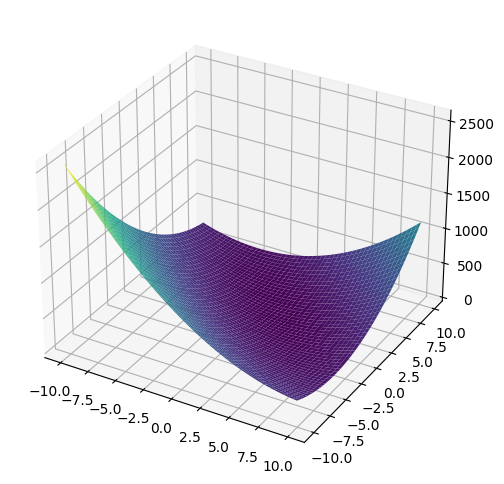

Delta : 0.0009815274646372562
GD work
Точка минимума из описания функции <built-in function min>
Точка минимума, полученная с помощью GD: [1.0006940443918464, 2.9993059556081536]


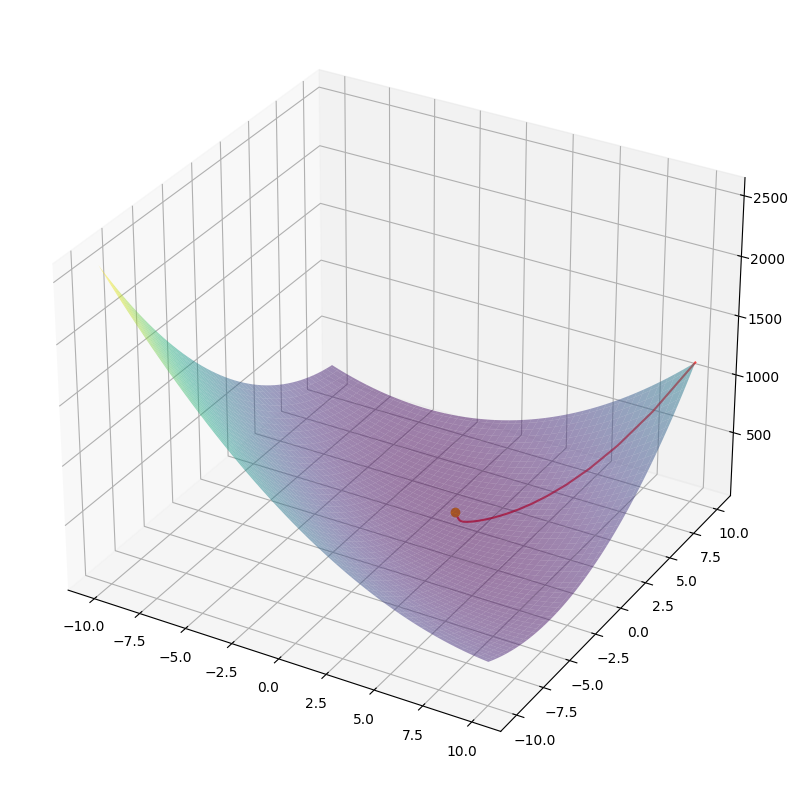

In [36]:
def user_func(nepoch = 10000, lr = 0.01, acc = 0.001, step = 0.05):
    x, y = symbols('x, y')
    ufunc = input("Your function f(x, y) = ")
    f = eval(ufunc)
    lx, rx = -10, 10
    ly, ry = -10, 10

    start = input("Your start (x, y) : ").split()
    x0, y0 = int(start[0]), int(start[1])
    start = np.array([x0, y0])
    Df = Matrix([f]).jacobian(Matrix(list(f.free_symbols)))

    m_ = input("Your min (x, y, z) : ").split()
    minxyz = np.array([int(m_[0]), int(m_[1]), int(m_[2])])

    print("Function")
    fig = plt.figure()
    fig.set_figwidth(6)
    fig.set_figheight(6)
    x = np.arange(lx, rx, step)
    y = np.arange(ly, ry, step)
    X, Y = np.meshgrid(x, y)
    Z = eval(ufunc, {'x': X, 'y': Y})
    ax = plt.subplot(projection="3d")
    ax.plot_surface(X, Y, Z, cmap="viridis")
    plt.show()

    dx = str(Df[0])
    dy = str(Df[1])
    hist = [np.array([x0, y0, eval(ufunc, {'x': x0, 'y': y0})])]
    cur = hist[-1]
    for _ in range(nepoch):
        X_der = eval(dx, {'x': cur[0], 'y': cur[1]})
        Y_der = eval(dy, {'x': cur[0], 'y': cur[1]})
        X_new, Y_new = cur[0] - lr * X_der, cur[1] - lr * Y_der
        cur = (X_new, Y_new, eval(ufunc, {'x': X_new, 'y': Y_new }))
        if la.norm(hist[-1] - minxyz) < acc:
            break
        hist.append(cur)
    print(f"Delta : {la.norm(hist[-1] - minxyz)}")
    hist = np.array(hist)

    print("GD work")
    fig2 = plt.figure()
    fig2.set_figwidth(10)
    fig2.set_figheight(10)
    X_lin = np.linspace(-10, 10, 100)
    Y_lin = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(X_lin, Y_lin)
    Z = eval(ufunc, {'x': X, 'y': Y})

    ax = plt.axes(projection = '3d')
    ax.plot_surface(X, Y, Z, cmap = 'viridis', alpha=0.5)
    ax.plot(hist[:, 0], hist[:, 1], hist[:, 2], c='red', alpha = 0.7) # plotting route
    ax.plot(hist[-1, 0], hist[-1, 1], hist[-1, 2], color='orange', marker='o') # min_point

    xk, yk = symbols('x, y')

    print(f"Точка минимума из описания функции {min}")
    print(f"Точка минимума, полученная с помощью GD: {[hist[-1][0], hist[-1][1]]}")

# (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2
# 10, 10
# 1 3 0
user_func()